### Activity 5
### 63010026 กฤตศยา นทีมณฑล
### 63010339 ณัฐวดี ติณภูมิ

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from time import time
import pandas_datareader.data as web

### Get Data

In [66]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [67]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

### Standardize Data

In [68]:
scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1.values),index = X1.index, columns=X1.columns)
X2 = pd.DataFrame(scaler.fit_transform(X2.values),index = X2.index, columns=X2.columns)
X3 = pd.DataFrame(scaler.fit_transform(X3.values),index = X3.index, columns=X3.columns)

## Calculate

In [69]:
backHistory = [30, 45, 60, 90, 180, 240]
return_period = 1
Y = base.shift(-return_period)
BH1, BH2, BH3 = backHistory[0], backHistory[1], backHistory[2]
X4_BH1 = base.diff(BH1).shift(-BH1)
X4_BH2 = base.diff(BH2).shift(-BH2)
X4_BH3 = base.diff(BH3).shift(-BH3)

In [70]:
X4 = pd.concat([X4_BH1, X4_BH2, X4_BH3], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

### Forming DataSet

In [71]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [72]:
#X,Y
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838737,-1.159659,-0.510343,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.380930,0.238228,0.134191
2017-09-26,69.393127,-1.154671,-0.462355,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.368641,0.154572,0.119620
2017-09-27,69.411934,-1.119086,-0.524949,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.350207,0.167771,0.091087
2017-09-28,69.994499,-1.111310,-0.524949,0.104039,0.552493,-1.268103,-1.505230,-1.261642,0.320099,0.171577,0.090621
2017-09-29,70.107269,-1.097200,-0.565286,0.101437,0.496376,-1.254585,-1.499434,-1.266250,0.268484,-0.034678,0.056456
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-16,244.520004,0.616757,1.088623,4.055628,-2.875734,0.713525,0.542763,0.667768,NaN,NaN,NaN
2022-09-19,242.449997,0.625308,1.131071,NaN,NaN,0.752132,0.590621,0.605566,NaN,NaN,NaN
2022-09-20,238.949997,0.564179,0.999114,NaN,NaN,0.688232,0.514573,0.766830,NaN,NaN,NaN
2022-09-21,240.979996,0.505267,0.872694,NaN,NaN,0.592296,0.387817,0.862437,NaN,NaN,NaN


## Data Prepation

In [73]:
dataset = dataset.dropna()

In [74]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838737,-1.159659,-0.510343,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.380930,0.238228,0.134191
2017-09-26,69.393127,-1.154671,-0.462355,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.368641,0.154572,0.119620
2017-09-27,69.411934,-1.119086,-0.524949,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.350207,0.167771,0.091087
2017-09-28,69.994499,-1.111310,-0.524949,0.104039,0.552493,-1.268103,-1.505230,-1.261642,0.320099,0.171577,0.090621
2017-09-29,70.107269,-1.097200,-0.565286,0.101437,0.496376,-1.254585,-1.499434,-1.266250,0.268484,-0.034678,0.056456
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-22,258.311676,0.891916,1.836473,3.146425,-1.411595,0.548630,0.460445,0.973018,1.683674,1.097435,-0.864754
2022-06-23,267.132996,0.915813,1.960409,2.973429,-1.479616,0.600727,0.507568,0.984537,1.261482,0.149589,-1.160295
2022-06-24,264.328949,1.097395,2.290298,3.038465,-1.423499,0.769357,0.707321,0.774894,0.515625,-0.522349,-1.702382
2022-06-27,255.936752,1.029568,2.357733,3.043668,-1.369082,0.752452,0.692177,0.742641,0.828192,-0.491054,-1.737021


In [75]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,177.761397,-0.044914,-0.069759,-0.157271,0.096097,-0.044977,-0.040915,-0.021096,0.008578,0.012474,-0.001114
std,78.340436,1.002199,0.959582,0.704716,0.911996,1.001566,1.005351,1.022463,0.975230,0.997449,1.001934
min,68.838737,-1.159659,-3.287446,-1.214892,-2.751596,-1.664437,-2.424575,-1.308869,-4.117029,-3.832302,-3.373579
25%,103.968788,-0.840252,-0.624414,-0.556727,-0.520528,-0.869196,-0.821047,-0.705281,-0.369795,-0.408867,-0.415951
50%,158.064133,-0.517599,-0.169640,-0.284877,0.044041,-0.474926,-0.424534,-0.261804,0.046169,0.060760,0.056456
75%,244.697418,0.881591,0.598891,0.052010,0.807569,0.855627,0.980822,0.414353,0.463446,0.511879,0.532749
max,340.882812,2.106610,2.365024,3.172439,2.077850,2.055518,1.992947,7.163257,3.126553,2.577557,2.544776


In [76]:
Y_dataset = dataset.iloc[:, 0]
Y_dataset = Y_dataset.reset_index()
Y_dataset = Y_dataset.drop(columns=['index'])
Y_dataset

C:\Users\ROG\AppData\Local\Temp\ipykernel_3816\2095979799.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Y_dataset = Y_dataset.drop(columns=['index'])


,Adj Close
,MSFT
0,68.838737
1,69.393127
2,69.411934
3,69.994499
4,70.107269
...,...
1176,258.311676
1177,267.132996
1178,264.328949


In [77]:
X_dataset = dataset.drop(dataset.columns[0],axis=1)
X_dataset = X_dataset.reset_index()
X_dataset = X_dataset.drop(columns=['index'])
X_dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.159659,-0.510343,-0.028635,0.589904,-1.287581,-1.525879,-1.185618,0.380930,0.238228,0.134191
1,-1.154671,-0.462355,0.039003,0.530386,-1.287320,-1.528735,-1.190225,0.368641,0.154572,0.119620
2,-1.119086,-0.524949,0.117046,0.494676,-1.272493,-1.515053,-1.224782,0.350207,0.167771,0.091087
3,-1.111310,-0.524949,0.104039,0.552493,-1.268103,-1.505230,-1.261642,0.320099,0.171577,0.090621
4,-1.097200,-0.565286,0.101437,0.496376,-1.254585,-1.499434,-1.266250,0.268484,-0.034678,0.056456
...,...,...,...,...,...,...,...,...,...,...
1176,0.891916,1.836473,3.146425,-1.411595,0.548630,0.460445,0.973018,1.683674,1.097435,-0.864754
1177,0.915813,1.960409,2.973429,-1.479616,0.600727,0.507568,0.984537,1.261482,0.149589,-1.160295
1178,1.097395,2.290298,3.038465,-1.423499,0.769357,0.707321,0.774894,0.515625,-0.522349,-1.702382
1179,1.029568,2.357733,3.043668,-1.369082,0.752452,0.692177,0.742641,0.828192,-0.491054,-1.737021


<AxesSubplot:>

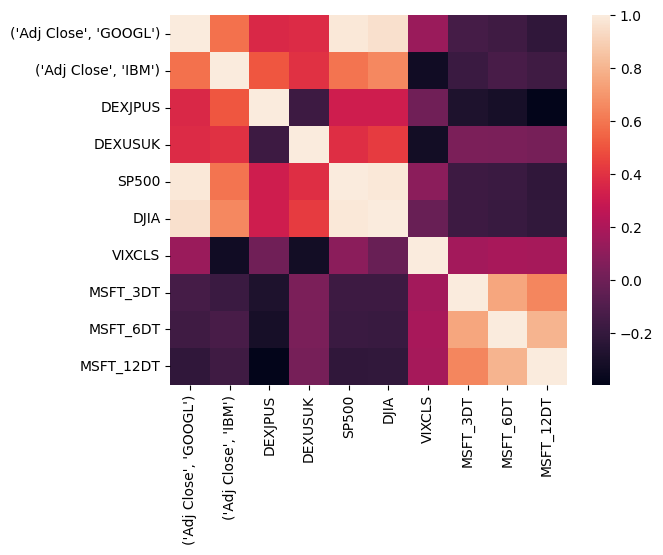

In [78]:
data_corr = X_dataset.corr()
sns.heatmap(data_corr)

In [79]:
lower = pd.DataFrame(np.tril(data_corr, -1),columns = X_dataset.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.582426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.364982,0.508866,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.375885,0.400592,-0.169140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.985380,0.593519,0.314536,0.386356,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.959524,0.652525,0.315243,0.431023,0.985791,0.000000,0.000000,0.000000,0.000000,0.0
6,0.139444,-0.331431,0.006566,-0.324618,0.094651,-0.022452,0.000000,0.000000,0.000000,0.0
7,-0.142062,-0.178762,-0.282659,0.042157,-0.166457,-0.170595,0.169617,0.000000,0.000000,0.0
8,-0.165006,-0.131148,-0.311644,0.037252,-0.181367,-0.183028,0.182854,0.751398,0.000000,0.0
9,-0.216911,-0.164472,-0.394620,0.025349,-0.219407,-0.213221,0.179434,0.647207,0.801369,0.0


In [80]:
#remove ถ้า >0.9
to_drop = [column for column in lower if any(lower[column] > 0.9)]
X_dataset.drop(to_drop, inplace=True, axis=1)
X_dataset

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.510343,-0.028635,0.589904,-1.525879,-1.185618,0.380930,0.238228,0.134191
1,-0.462355,0.039003,0.530386,-1.528735,-1.190225,0.368641,0.154572,0.119620
2,-0.524949,0.117046,0.494676,-1.515053,-1.224782,0.350207,0.167771,0.091087
3,-0.524949,0.104039,0.552493,-1.505230,-1.261642,0.320099,0.171577,0.090621
4,-0.565286,0.101437,0.496376,-1.499434,-1.266250,0.268484,-0.034678,0.056456
...,...,...,...,...,...,...,...,...
1176,1.836473,3.146425,-1.411595,0.460445,0.973018,1.683674,1.097435,-0.864754
1177,1.960409,2.973429,-1.479616,0.507568,0.984537,1.261482,0.149589,-1.160295
1178,2.290298,3.038465,-1.423499,0.707321,0.774894,0.515625,-0.522349,-1.702382
1179,2.357733,3.043668,-1.369082,0.692177,0.742641,0.828192,-0.491054,-1.737021


## Train / Test

In [81]:
#Option 1
Test_size = int(np.floor(0.3 * len(X_dataset)))
Train_size = int(np.floor(0.7 * len(X_dataset)))
X_train_1, X_test_1= X_dataset[0:Train_size], X_dataset[Train_size:len(X_dataset)]
Y_train_1, Y_test_1 = Y_dataset[0:Train_size], Y_dataset[Train_size:len(X_dataset)]

In [82]:
#Option 2
X_train_2, X_test_2, Y_train_2, Y_test_2 = model_selection.train_test_split(X_dataset,Y_dataset,test_size = 0.3, random_state=0)

### GridSearchCV()

In [83]:
#Create Model list
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [84]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [85]:
# Create Parameter Dictionary for SVR
kernel = ['linear', 'rbf', 'poly']
C_list = [10, 100]
ep_list = [0.1, 1, 5]
gamma = [0.01, 0.1]
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

### Option 1

In [86]:
#a
for EST in regression:
    model = regression[EST]
if (EST == 'LR'):
    params = params_LR
else:
    params = params_SVR

grid = GridSearchCV(estimator=model, n_jobs = 1,
    verbose = 10,
    cv = 2,
    scoring = 'neg_mean_squared_error',
    param_grid = params)

grid_result = grid.fit(X_train_1, Y_train_1)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 1/2; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1370.522 total time=   0.0s
[CV 2/2; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 2/2; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1981.704 total time=   0.0s
[CV 1/2; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 1/2; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-4664.538 total time=   0.0s
[CV 2/2; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 2/2; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-5042.149 total time=   0.0s
[CV 1/2; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 1/2; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5684.854 total

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-1991.934 total time=   0.0s
[CV 1/2; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 1/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-4616.794 total time=   0.0s
[CV 2/2; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 2/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-5082.572 total time=   0.0s
[CV 1/2; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 1/2; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-5735.454 total time=   0.0s
[CV 2/2; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 2/2; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-6399.362 total time=   0.0s
[CV 1/2; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 1/2; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, ke

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-5701.964 total time=   0.0s
[CV 2/2; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 2/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-6486.132 total time=   0.0s
[CV 1/2; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 1/2; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-1575.460 total time=   0.0s
[CV 2/2; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 2/2; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-1874.094 total time=   0.0s
[CV 1/2; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 1/2; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-3526.108 total time=   0.0s
[CV 2/2; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 2/2; 17/72] END C=10, degree=2, epsilon=5, gamma=0.

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3504.752 total time=   0.0s
[CV 2/2; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 2/2; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-4148.172 total time=   0.0s
[CV 1/2; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 1/2; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4596.500 total time=   0.0s
[CV 2/2; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 2/2; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-6293.553 total time=   0.0s
[CV 1/2; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 1/2; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-1304.979 total time=   0.0s
[CV 2/2; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 2/2; 25/72] END C=10, degree=3, epsilon=1, gamm

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-4681.509 total time=   0.0s
[CV 2/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-6105.524 total time=   0.0s
[CV 1/2; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/2; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-1575.460 total time=   0.0s
[CV 2/2; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 2/2; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-1874.094 total time=   0.0s
[CV 1/2; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/2; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-4717.638 total time=   0.0s
[CV 2/2; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/2; 32/72] END C=10, degree=3, epsilon=5, gamma=0

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-1934.245 total time=   0.0s
[CV 1/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-2497.301 total time=   0.0s
[CV 2/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-2638.372 total time=   0.0s
[CV 1/2; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/2; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5376.547 total time=   0.0s
[CV 2/2; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/2; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6223.771 total time=   0.0s
[CV 1/2; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/2; 40/72] END C=100, degree=2, eps

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-3759.986 total time=   0.0s
[CV 2/2; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4449.567 total time=   0.0s
[CV 1/2; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/2; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-872.980 total time=   0.0s
[CV 2/2; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 2/2; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-1944.807 total time=   0.0s
[CV 1/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-2447.265 total time=   0.0s
[CV 2/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/2; 44/72] END C=100, degree=2, epsilon=1

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-1944.807 total time=   0.0s
[CV 1/2; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-2296.321 total time=   0.0s
[CV 2/2; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-3167.444 total time=   0.0s
[CV 1/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-3870.617 total time=   0.0s
[CV 2/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-4485.664 total time=   0.0s
[CV 1/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-1146.808 total time=   0.0s
[CV 2/2; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/2; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-1866.966 total time=   0.0s
[CV 1/2; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/2; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-2285.121 total time=   0.0s
[CV 2/2; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/2; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-3897.827 total time=   0.0s
[CV 1/2; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/2; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-3999.196 total time=   0.0s
[CV 2/2; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/2; 54/72] END C=100, degree=2, epsilon=5, gamma

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-852.823 total time=   0.0s
[CV 2/2; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/2; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1934.245 total time=   0.0s
[CV 1/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-2201.465 total time=   0.0s
[CV 2/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3200.404 total time=   0.0s
[CV 1/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4579.393 total time=   0.0s
[CV 2/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 60/72] END C=100, degree=3, epsilon

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-872.980 total time=   0.0s
[CV 2/2; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 2/2; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-1944.807 total time=   0.0s
[CV 1/2; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/2; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-2447.265 total time=   0.0s
[CV 2/2; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/2; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-2565.356 total time=   0.0s
[CV 1/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5873.544 total time=   0.0s
[CV 2/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 63/72] END C=100, degree=3, epsilon=1, g

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-3167.444 total time=   0.0s
[CV 1/2; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-4620.143 total time=   0.0s
[CV 2/2; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-5317.278 total time=   0.0s
[CV 1/2; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-1146.808 total time=   0.0s
[CV 2/2; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/2; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-1866.966 total time=   0.0s
[CV 1/2; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/2; 68/72] END C=100, degree=3, epsilon=5, ga

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

In [87]:
# Show Best Parameters for both models
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'C': 100, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best score:  -1393.5337590601657


In [88]:
# Show Score for each parameter combination for both model
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

-1676.112942 (305.590928) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-4853.343494 (188.805042) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-6071.210075 (386.356564) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-1676.112942 (305.590928) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-3826.462365 (321.709984) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-5110.135018 (231.898799) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-1648.456558 (343.477910) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-4849.682954 (232.889290) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-6067.408285 (331.953994) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-1648.456558 (343.477910) with: {'C': 10, 'degree': 2, 'epsilon': 1, '

<AxesSubplot:xlabel='param'>

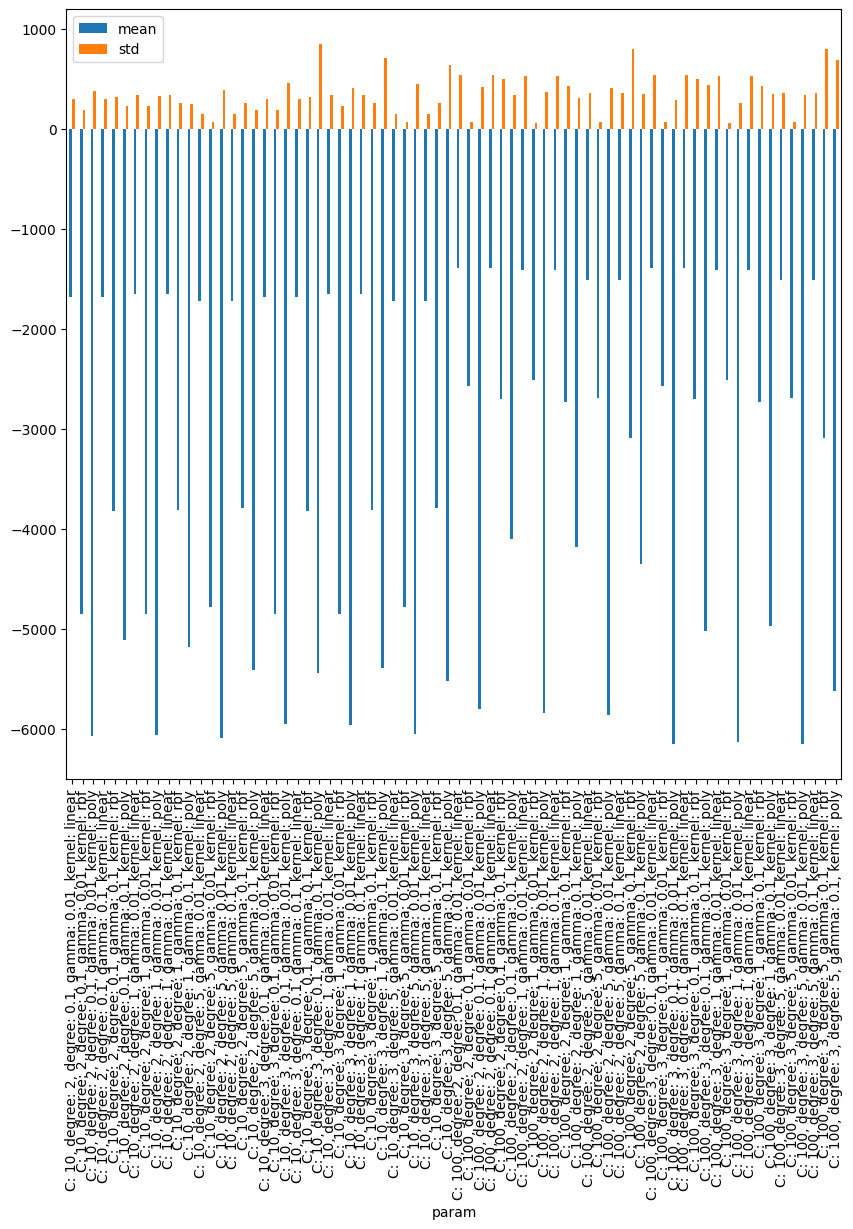

In [89]:
df_plot = pd.DataFrame()

df_plot['param'] = [f"C: { index['C'] }, degree: { index['degree'] }, degree: { index['epsilon'] }, gamma: { index['gamma'] }, kernel: { index['kernel'] }" for index in params]
df_plot['mean'] = means
df_plot['std'] = stds

df_plot.plot.bar(x='param',y= ['mean','std'],figsize = (10,10))

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Plot')

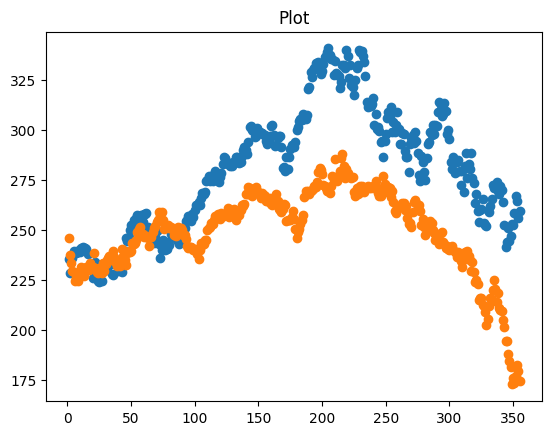

In [90]:
svr = SVR(kernel = grid_result.best_params_['kernel'], degree = grid_result.best_params_['degree'], C = grid_result.best_params_['C'], epsilon = grid_result.best_params_['epsilon'], gamma = grid_result.best_params_['gamma'])
svr_grid_pred = svr.fit(X_train_1, Y_train_1).predict(X_test_1)
plt.scatter(range(1, np.count_nonzero(Y_test_1) + 1), Y_test_1)
plt.scatter(range(1, np.count_nonzero(svr_grid_pred) + 1), svr_grid_pred)
plt.title(label = 'Plot')

In [91]:
#b
k=2
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid_rand = RandomizedSearchCV( estimator=model, 
    n_jobs = 1,
    verbose = 10,
    cv = k,
    scoring = 'neg_mean_squared_error',
    param_distributions=params )

    grid_rand_result = grid_rand.fit(X_train_1, Y_train_1)

c:\Python36\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/2; 1/4] END fit_intercept=True, normalize=True;, score=-890.084 total time=   0.0s
[CV 2/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/2; 1/4] END fit_intercept=True, normalize=True;, score=-1916.446 total time=   0.0s
[CV 1/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/2; 2/4] END fit_intercept=True, normalize=False;, score=-890.084 total time=   0.0s
[CV 2/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/2; 2/4] END fit_intercept=True, normalize=False;, score=-1916.446 total time=   0.0s
[CV 1/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 1/2; 3/4] END fit_intercept=False, normalize=True;, score=-4968.605 total time=   0.0s
[CV 2/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 6/10] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-3544.747 total time=   0.0s
[CV 2/2; 6/10] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf...........
[CV 2/2; 6/10] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-4075.339 total time=   0.0s
[CV 1/2; 7/10] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 1/2; 7/10] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-2447.265 total time=   0.0s
[CV 2/2; 7/10] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 2/2; 7/10] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-2565.356 total time=   0.0s
[CV 1/2; 8/10] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 1/2; 8/10] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-852.823 total time=   0.0s
[CV 2/2; 8/10] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 2/2; 8/10] END C=100, degree=2, epsilon=0.1, gamma=0.1, k

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

### Option 2

In [92]:
#a
for EST in regression:
    model = regression[EST]
if (EST == 'LR'):
    params = params_LR
else:
    params = params_SVR

grid = GridSearchCV(estimator=model, n_jobs = 1,
    verbose = 10,
    cv = 2,
    scoring = 'neg_mean_squared_error',
    param_grid = params)

grid_result = grid.fit(X_train_2, Y_train_2)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 1/2; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-296.115 total time=   0.0s
[CV 2/2; 1/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear.....
[CV 2/2; 1/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-274.636 total time=   0.0s
[CV 1/2; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 1/2; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-939.283 total time=   0.0s
[CV 2/2; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 2/2; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-839.370 total time=   0.0s
[CV 1/2; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 1/2; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5874.885 total tim

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-2736.448 total time=   0.0s
[CV 1/2; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 1/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-292.553 total time=   0.0s
[CV 2/2; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 2/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-275.509 total time=   0.0s
[CV 1/2; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 1/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-938.592 total time=   0.0s
[CV 2/2; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 2/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-835.260 total time=   0.0s
[CV 1/2; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 1/2; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, ker

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-950.196 total time=   0.0s
[CV 2/2; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-855.505 total time=   0.0s
[CV 1/2; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 1/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-5877.930 total time=   0.0s
[CV 2/2; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 2/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-7177.875 total time=   0.0s
[CV 1/2; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 1/2; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-293.545 total time=   0.0s
[CV 2/2; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 2/2; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, k

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-292.553 total time=   0.0s
[CV 2/2; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 2/2; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-275.509 total time=   0.0s
[CV 1/2; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 1/2; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-298.970 total time=   0.0s
[CV 2/2; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/2; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-204.295 total time=   0.0s
[CV 1/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-2060.866 total time=   0.0s
[CV 2/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kern

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-4785.312 total time=   0.0s
[CV 1/2; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/2; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-289.724 total time=   0.0s
[CV 2/2; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/2; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-275.064 total time=   0.0s
[CV 1/2; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/2; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-84.277 total time=   0.0s
[CV 2/2; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-68.857 total time=   0.0s
[CV 1/2; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 42/72] END C=100, degree=2, epsilon=0.1

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-289.508 total time=   0.0s
[CV 2/2; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 2/2; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-275.759 total time=   0.0s
[CV 1/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-265.517 total time=   0.0s
[CV 2/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-209.310 total time=   0.0s
[CV 1/2; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-4096.099 total time=   0.0s
[CV 2/2; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 45/72] END C=100, degree=2, epsilon=1, gamm

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-83.018 total time=   0.0s
[CV 2/2; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-66.970 total time=   0.0s
[CV 1/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-1456.201 total time=   0.0s
[CV 2/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-1629.976 total time=   0.0s
[CV 1/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-289.632 total time=   0.0s
[CV 2/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01,

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-289.632 total time=   0.0s
[CV 2/2; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/2; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-270.210 total time=   0.0s
[CV 1/2; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/2; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-84.294 total time=   0.0s
[CV 2/2; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/2; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-60.842 total time=   0.0s
[CV 1/2; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/2; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-1414.487 total time=   0.0s
[CV 2/2; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/2; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, 

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-275.064 total time=   0.0s
[CV 1/2; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/2; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-261.291 total time=   0.0s
[CV 2/2; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/2; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-207.715 total time=   0.0s
[CV 1/2; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/2; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5759.602 total time=   0.0s
[CV 2/2; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/2; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-7258.921 total time=   0.0s
[CV 1/2; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/2; 58/72] END C=100, degree=3, epsilo

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 1/2; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-289.508 total time=   0.0s
[CV 2/2; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 2/2; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-275.759 total time=   0.0s
[CV 1/2; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/2; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-83.018 total time=   0.0s
[CV 2/2; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/2; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-66.970 total time=   0.0s
[CV 1/2; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-756.080 total time=   0.0s
[CV 2/2; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, k

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

In [93]:
# Show Best Parameters for both models
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'C': 100, 'degree': 2, 'epsilon': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  -72.56825894431276


In [94]:
# Show Score for each parameter combination for both model
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

-285.375896 (10.739465) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-889.326567 (49.956427) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-6631.911947 (757.026884) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-285.375896 (10.739465) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-251.208106 (47.274582) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-2461.725488 (274.722822) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-284.030921 (8.522215) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-886.926325 (51.666137) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-6611.494661 (736.289044) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-284.030921 (8.522215) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.1, 'ke

In [95]:
#b
k=2
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid_rand = RandomizedSearchCV( estimator=model, 
    n_jobs = 1,
    verbose = 10,
    cv = k,
    scoring = 'neg_mean_squared_error',
    param_distributions=params )

    grid_rand_result = grid_rand.fit(X_train_2, Y_train_2)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/2; 1/4] END fit_intercept=True, normalize=True;, score=-272.874 total time=   0.0s
[CV 2/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/2; 1/4] END fit_intercept=True, normalize=True;, score=-254.776 total time=   0.0s
[CV 1/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/2; 2/4] END fit_intercept=True, normalize=False;, score=-272.874 total time=   0.0s
[CV 2/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/2; 2/4] END fit_intercept=True, normalize=False;, score=-254.776 total time=   0.0s
[CV 1/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 1/2; 3/4] END fit_intercept=False, normalize=True;, score=-30681.045 total time=   0.0s
[CV 2/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 2

c:\Python36\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings

[CV 1/2; 5/10] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-939.283 total time=   0.0s
[CV 2/2; 5/10] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 2/2; 5/10] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-839.370 total time=   0.0s
[CV 1/2; 6/10] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 1/2; 6/10] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-289.724 total time=   0.0s
[CV 2/2; 6/10] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 2/2; 6/10] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-275.064 total time=   0.0s
[CV 1/2; 7/10] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/2; 7/10] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-255.329 total time=   0.0s
[CV 2/2; 7/10] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........


c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

[CV 2/2; 7/10] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-210.491 total time=   0.0s
[CV 1/2; 8/10] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/2; 8/10] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-289.632 total time=   0.0s
[CV 2/2; 8/10] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 2/2; 8/10] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-270.210 total time=   0.0s
[CV 1/2; 9/10] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/2; 9/10] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-255.329 total time=   0.0s
[CV 2/2; 9/10] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/2; 9/10] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-210.491 total time=   0.0s
[CV 1/2; 10/10] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 10/10] END C=100, degree=3, epsilon=1, gamma=0.01,

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Python36\lib\site-packages\sklearn\utils\validat

In [96]:
df_plot = pd.DataFrame()
df_plot['param'] = [f"C: { index['C'] }, degree: { index['degree'] }, degree: { index['epsilon'] }, gamma: { index['gamma'] }, kernel: { index['kernel'] }" for index in params]
# df_plot['mean'] = means
# df_plot['std'] = stds

df_plot.plot.bar(x='param',y= ['mean','std'],figsize = (10,10))

TypeError: string indices must be integers

In [ ]:
svr = SVR(kernel = grid_result.best_params_['kernel'], degree = grid_result.best_params_['degree'], C = grid_result.best_params_['C'], epsilon = grid_result.best_params_['epsilon'], gamma = grid_result.best_params_['gamma'])
svr_grid_pred = svr.fit(X_train_1, Y_train_1).predict(X_test_1)
plt.scatter(range(1, np.count_nonzero(Y_test_1) + 1), Y_test_1)
plt.scatter(range(1, np.count_nonzero(svr_grid_pred) + 1), svr_grid_pred)
plt.title(label = 'Plot')